In [33]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, minimize
from scipy.stats import norm
from models import *

In [34]:
from dataloader import import_kaepora
data = import_kaepora()["v_siII"]
data.head()

kaepora
2006td    10812.60
1996z     12142.10
1996x     11173.10
1996c     10689.10
2005m      8093.94
Name: v_siII, dtype: float64

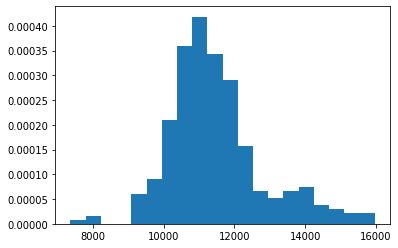

In [3]:
bins = 20
hist = plt.hist(data, bins, density=True)
density, bins = hist[0], hist[1]
bin_width = np.mean(bins[1:] - bins[:-1])


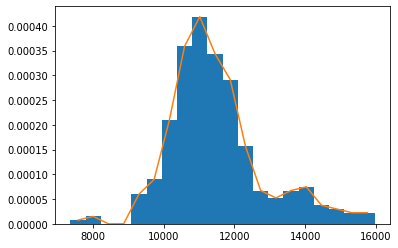

In [4]:
plt.hist(data, bins, density=True)
plt.plot(bins[:-1] + bin_width / 2, density)

In [112]:
from models import gaussian, bimodal_gaussian
from scipy.optimize import minimize


def binned_fit(x, guess_params, bins=20, pdf=gaussian, **kwargs):
    # Bin data
    N = len(x)
    y, bins = np.histogram(x, bins)
    bin_width = np.mean(bins[1:]- bins[:-1])

    # Predict and calculate loss
    def loss(params):
        """L2 loss"""
        bin_midpoints = (bins[1:] + bins[:-1]) / 2
        y_pred = bin_width * pdf(bin_midpoints, *params)
        return np.sum((y - y_pred) ** 2)

    result = minimize(loss, guess_params, method="Nelder-Mead", **kwargs)
    print(result.message)
    return result


unimodal_params = binned_fit(data, [np.mean(data), np.std(data)],
                             bins=20,
                             pdf=gaussian)
bimodal_params = binned_fit(data, [11000, 700, 14000, 1200, 200],
                            bins=20,
                            pdf=bimodal_gaussian,
                           )

print(f"{unimodal_params}\n{bimodal_params}")

Optimization terminated successfully.
Optimization terminated successfully.
 final_simplex: (array([[1.14513821e+04, 2.03989217e+00],
       [1.14513821e+04, 2.03996374e+00],
       [1.14513821e+04, 2.03987766e+00]]), array([8769., 8769., 8769.]))
           fun: 8769.0
       message: 'Optimization terminated successfully.'
          nfev: 154
           nit: 79
        status: 0
       success: True
             x: array([1.14513821e+04, 2.03989217e+00])
 final_simplex: (array([[11125.06333631,   879.14158027, 78891.50597985,  1542.40184217,
          276.89764793],
       [11125.06333587,   879.1415804 , 78891.50598995,  1542.40184234,
          276.89764796],
       [11125.06333605,   879.14158024, 78891.50593748,  1542.40184201,
          276.8976479 ],
       [11125.06333612,   879.14158035, 78891.50597736,  1542.40184216,
          276.89764796],
       [11125.06333599,   879.14158022, 78891.50597501,  1542.40184224,
          276.89764796],
       [11125.06333604,   879.1415802

In [174]:
unimodal_params = np.loadtxt('results/binned_unimodal_params.csv', delimiter=',')
bimodal_params = np.loadtxt('results/binned_bimodal_params.csv', delimiter=',')

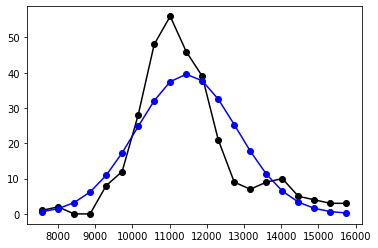

In [175]:
_y, _bins = np.histogram(data, bins=20)
_bin_midpoints = (_bins[1:] + _bins[:-1]) / 2
_bin_width = np.mean(_bins[1:] - _bins[:-1])
plt.plot(_bin_midpoints, _y, 'k-o')

_y_pred = len(data) * _bin_width * gaussian(_bin_midpoints, *[np.mean(data), np.std(data)])
plt.plot(_bin_midpoints, _y_pred, 'b-o')

# _y_pred = len(data) * _bin_width * bimodal_gaussian(_bin_midpoints, *bimodal_params)
# plt.plot(_bin_midpoints, _y_pred)

# plt.hist(data, bins);

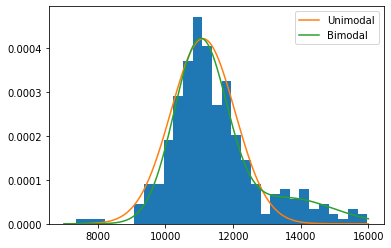

In [176]:
# plt.hist(data, bins, density=True)

_x = np.linspace(7000, 16000, 1000)
plt.hist(data, bins, density=True)
plt.plot(_x, gaussian(_x, *unimodal_params), label="Unimodal")
plt.plot(_x, bimodal_gaussian(_x, *bimodal_params), label="Bimodal")
plt.legend()

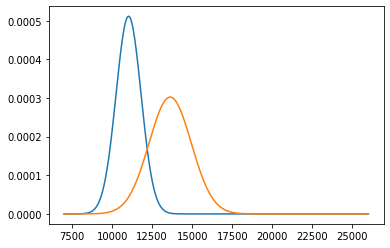

In [177]:
_x = np.linspace(7000, 26000, 1000)
plt.plot(_x, gaussian(_x, *bimodal_params[:2]))
plt.plot(_x, gaussian(_x, *bimodal_params[2:4]))